In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import datetime as dt

delta = pd.read_csv(r'C:\Users\david\Downloads\Discord Data\messages\c662921476365877277\messages.csv')

In [2]:
delta.columns = delta.columns.str.lower()
delta

,id,timestamp,contents,attachments
0,1053461535596482710,2022-12-17 00:00:02.455000+00:00,Can you render furry porn?,NaN
1,1053461508954259496,2022-12-16 23:59:56.103000+00:00,"that for the keyboard, looks like theres a lil...",NaN
2,1053461288803635302,2022-12-16 23:59:03.615000+00:00,just woke up it was great,NaN
3,1053281671912374292,2022-12-16 12:05:19.611000+00:00,I hope you have had a restful sleep.,NaN
4,1053281634960543865,2022-12-16 12:05:10.801000+00:00,GOOD MORNING!,NaN
...,...,...,...,...
15378,662923949876969472,2020-01-04 07:43:06.182000+00:00,They're my favorite band,NaN
15379,662923907816488980,2020-01-04 07:42:56.154000+00:00,Oh fuck yeah I do,NaN
15380,662921957700009984,2020-01-04 07:35:11.210000+00:00,"What's wrong, you can't believe that you're so...",NaN
15381,662921848098521088,2020-01-04 07:34:45.079000+00:00,I just said you were cute was all,NaN


In [3]:
delta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15383 entries, 0 to 15382
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15383 non-null  int64 
 1   timestamp    15383 non-null  object
 2   contents     13888 non-null  object
 3   attachments  1454 non-null   object
dtypes: int64(1), object(3)
memory usage: 480.8+ KB


In [4]:
# Add seperate columns for day, month, year
delta['day'] = delta['timestamp'].str[8:10]
delta['month'] = delta['timestamp'].str[5:7]
delta['year'] = delta['timestamp'].str[:4]

# Simplifiy timestamp column
# delta['timestamp'] = delta['timestamp'].str[:11]

delta['datetime'] = pd.to_datetime(delta['timestamp'])
delta['day_of_week'] = delta['datetime'].dt.dayofweek
delta

,id,timestamp,contents,attachments,day,month,year,datetime,day_of_week
0,1053461535596482710,2022-12-17 00:00:02.455000+00:00,Can you render furry porn?,NaN,17,12,2022,2022-12-17 00:00:02.455000+00:00,5
1,1053461508954259496,2022-12-16 23:59:56.103000+00:00,"that for the keyboard, looks like theres a lil...",NaN,16,12,2022,2022-12-16 23:59:56.103000+00:00,4
2,1053461288803635302,2022-12-16 23:59:03.615000+00:00,just woke up it was great,NaN,16,12,2022,2022-12-16 23:59:03.615000+00:00,4
3,1053281671912374292,2022-12-16 12:05:19.611000+00:00,I hope you have had a restful sleep.,NaN,16,12,2022,2022-12-16 12:05:19.611000+00:00,4
4,1053281634960543865,2022-12-16 12:05:10.801000+00:00,GOOD MORNING!,NaN,16,12,2022,2022-12-16 12:05:10.801000+00:00,4
...,...,...,...,...,...,...,...,...,...
15378,662923949876969472,2020-01-04 07:43:06.182000+00:00,They're my favorite band,NaN,04,01,2020,2020-01-04 07:43:06.182000+00:00,5
15379,662923907816488980,2020-01-04 07:42:56.154000+00:00,Oh fuck yeah I do,NaN,04,01,2020,2020-01-04 07:42:56.154000+00:00,5
15380,662921957700009984,2020-01-04 07:35:11.210000+00:00,"What's wrong, you can't believe that you're so...",NaN,04,01,2020,2020-01-04 07:35:11.210000+00:00,5
15381,662921848098521088,2020-01-04 07:34:45.079000+00:00,I just said you were cute was all,NaN,04,01,2020,2020-01-04 07:34:45.079000+00:00,5


In [5]:
# plt.pie(delta['day_of_week'])
# plt.show()

In [6]:
delta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15383 entries, 0 to 15382
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           15383 non-null  int64              
 1   timestamp    15383 non-null  object             
 2   contents     13888 non-null  object             
 3   attachments  1454 non-null   object             
 4   day          15383 non-null  object             
 5   month        15383 non-null  object             
 6   year         15383 non-null  object             
 7   datetime     15383 non-null  datetime64[ns, UTC]
 8   day_of_week  15383 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 1.1+ MB


In [7]:
dictionary = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
delta['dow'] = delta['day_of_week'].map(dictionary)
delta

,id,timestamp,contents,attachments,day,month,year,datetime,day_of_week,dow
0,1053461535596482710,2022-12-17 00:00:02.455000+00:00,Can you render furry porn?,NaN,17,12,2022,2022-12-17 00:00:02.455000+00:00,5,Saturday
1,1053461508954259496,2022-12-16 23:59:56.103000+00:00,"that for the keyboard, looks like theres a lil...",NaN,16,12,2022,2022-12-16 23:59:56.103000+00:00,4,Friday
2,1053461288803635302,2022-12-16 23:59:03.615000+00:00,just woke up it was great,NaN,16,12,2022,2022-12-16 23:59:03.615000+00:00,4,Friday
3,1053281671912374292,2022-12-16 12:05:19.611000+00:00,I hope you have had a restful sleep.,NaN,16,12,2022,2022-12-16 12:05:19.611000+00:00,4,Friday
4,1053281634960543865,2022-12-16 12:05:10.801000+00:00,GOOD MORNING!,NaN,16,12,2022,2022-12-16 12:05:10.801000+00:00,4,Friday
...,...,...,...,...,...,...,...,...,...,...
15378,662923949876969472,2020-01-04 07:43:06.182000+00:00,They're my favorite band,NaN,04,01,2020,2020-01-04 07:43:06.182000+00:00,5,Saturday
15379,662923907816488980,2020-01-04 07:42:56.154000+00:00,Oh fuck yeah I do,NaN,04,01,2020,2020-01-04 07:42:56.154000+00:00,5,Saturday
15380,662921957700009984,2020-01-04 07:35:11.210000+00:00,"What's wrong, you can't believe that you're so...",NaN,04,01,2020,2020-01-04 07:35:11.210000+00:00,5,Saturday
15381,662921848098521088,2020-01-04 07:34:45.079000+00:00,I just said you were cute was all,NaN,04,01,2020,2020-01-04 07:34:45.079000+00:00,5,Saturday


In [32]:
df['day_of_week'] = df['day_of_week'].str.lower()
df

,day_of_week,value_counts,dow_per
0,wensday,2691,17.493337
1,tuesday,2535,16.479230
2,monday,2525,16.414223
3,sunday,2336,15.185594
4,friday,2115,13.748944
5,thursday,1836,11.935253
6,saturday,1345,8.743418


In [38]:
delta[delta.columns[7]].mean()

Timestamp('2021-03-27 08:32:49.436832256+0000', tz='UTC')

In [26]:
df = delta['dow'].value_counts()
df = pd.DataFrame(df)
df = df.reset_index()
df = df.rename(columns={'index':'day_of_week','dow':'value_counts'})
df['dow_per'] = (df['value_counts']/df['value_counts'].sum()) * 100
df

,day_of_week,value_counts,dow_per
0,Wensday,2691,17.493337
1,Tuesday,2535,16.479230
2,Monday,2525,16.414223
3,Sunday,2336,15.185594
4,Friday,2115,13.748944
5,Thursday,1836,11.935253
6,Saturday,1345,8.743418


In [28]:
df['value_counts'] = df['value_counts'].map(+=1)

SyntaxError: invalid syntax (1616883990.py, line 1)

Text(0.5, 1.0, 'Same thing just visualized differently')

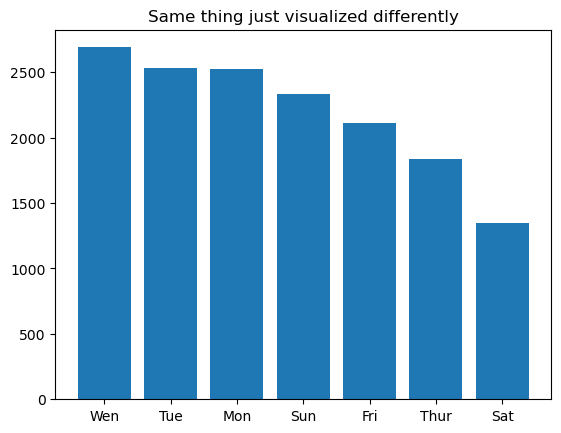

In [25]:
plt.bar(['Wen', 'Tue', 'Mon', 'Sun', 'Fri', 'Thur', 'Sat'], delta['dow'].value_counts())
plt.title('Same thing just visualized differently')

Text(0.5, 1.0, 'Frequency Evo Sends Messages to Delta Based on Day of Week')

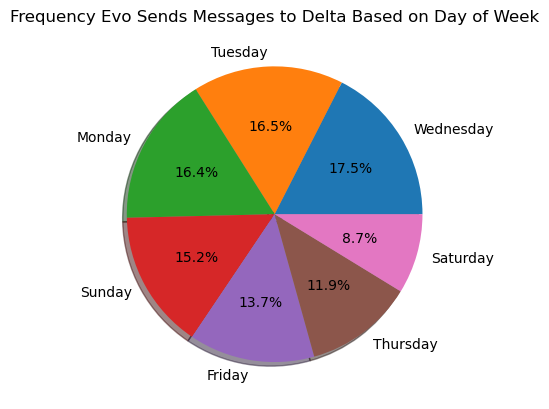

In [9]:
plt.pie(delta['dow'].value_counts(), labels=['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Friday', 'Thursday', 'Saturday'], shadow=True, autopct='%1.1f%%')
plt.title('Frequency Evo Sends Messages to Delta Based on Day of Week')

In [10]:
mssg_frequency = delta['timestamp'].value_counts(dropna=True)
msg = pd.DataFrame(mssg_frequency)
msg = msg.reset_index()
msg = msg.sort_values(by=['index'])
msg

,index,timestamp
15382,2020-01-04 07:34:37.048000+00:00,1
5136,2020-01-04 07:34:45.079000+00:00,1
5135,2020-01-04 07:35:11.210000+00:00,1
5134,2020-01-04 07:42:56.154000+00:00,1
5133,2020-01-04 07:43:06.182000+00:00,1
...,...,...
10251,2022-12-16 12:05:10.801000+00:00,1
10250,2022-12-16 12:05:19.611000+00:00,1
10249,2022-12-16 23:59:03.615000+00:00,1
7692,2022-12-16 23:59:56.103000+00:00,1


In [11]:
# plt.plot(msg['index'], msg['timestamp'])

In [12]:
delta['timestamp'] = pd.to_datetime(delta['timestamp'])

delta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15383 entries, 0 to 15382
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           15383 non-null  int64              
 1   timestamp    15383 non-null  datetime64[ns, UTC]
 2   contents     13888 non-null  object             
 3   attachments  1454 non-null   object             
 4   day          15383 non-null  object             
 5   month        15383 non-null  object             
 6   year         15383 non-null  object             
 7   datetime     15383 non-null  datetime64[ns, UTC]
 8   day_of_week  15383 non-null  int64              
 9   dow          15383 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(2), object(6)
memory usage: 1.2+ MB


In [13]:
# Count number of messages per day & store as pd.series
freq_day = delta['day'].value_counts()
freq_month = delta['month'].value_counts()
freq_year = delta['year'].value_counts()

# Convert to dataframes
day = pd.DataFrame(freq_day)
month = pd.DataFrame(freq_month)
year = pd.DataFrame(freq_year)

# Reset indexs
day = day.reset_index()
month = month.reset_index()
year = year.reset_index()

# Rename columns
day = day.rename(columns={'index':'day','day':'num_mssg'})
month = month.rename(columns={'index':'month','month':'num_mssg'})
year = year.rename(columns={'index':'year','year':'num_mssg'})

# Convert to numeric dtype
day['day'] = day['day'].astype(float)
day['day'] = day['day'].astype(float)

month['month'] = month['month'].astype(float)
month['month'] = month['month'].astype(float)

year['year'] = year['year'].astype(float)
year['num_mssg'] = year['num_mssg'].astype(float)

# Sort dataframes by time variable
day = day.sort_values(by=['day'])
month = month.sort_values(by=['month'])
year = year.sort_values(by=['year'])

day

,day,num_mssg
19,1.0,432
1,2.0,760
5,3.0,668
7,4.0,618
0,5.0,864
20,6.0,431
23,7.0,331
16,8.0,464
8,9.0,609
2,10.0,756


In [14]:
month

,month,num_mssg
7,1.0,1118
6,2.0,1203
8,3.0,737
9,4.0,622
0,5.0,2624
3,6.0,1749
2,7.0,1774
4,8.0,1474
1,9.0,1968
5,10.0,1459


In [15]:
year

,year,num_mssg
0,2020.0,7636.0
2,2021.0,3786.0
1,2022.0,3961.0


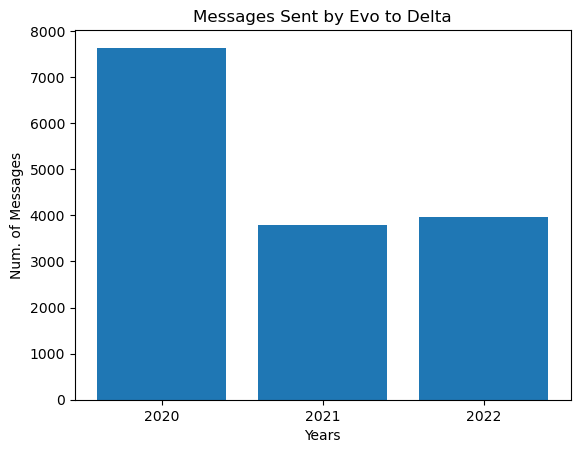

In [16]:
plt.bar(year['year'], year['num_mssg'])
plt.xticks(ticks=[2020,2021,2022], labels=['2020','2021','2022'])
plt.xlabel('Years')
plt.ylabel('Num. of Messages')
plt.title('Messages Sent by Evo to Delta')
plt.show()

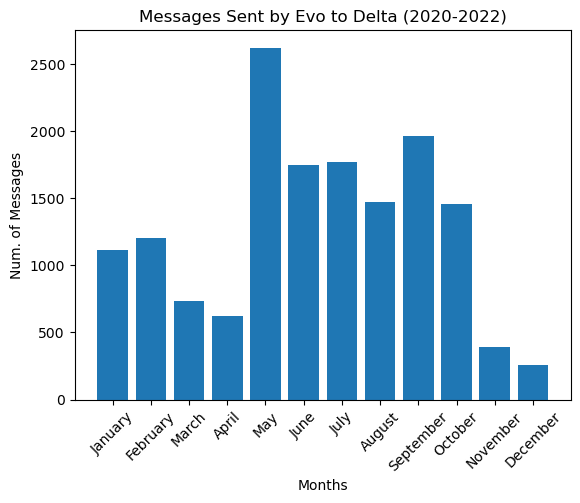

In [17]:
plt.bar(month['month'], month['num_mssg'])
plt.xticks(rotation=45, ticks=[1,2,3,4,5,6,7,8,9,10,11,12],
           labels=['January','February','March', 'April','May','June','July','August','September','October','November','December'])
plt.xlabel('Months')
plt.ylabel('Num. of Messages')
plt.title('Messages Sent by Evo to Delta (2020-2022)')
plt.show()

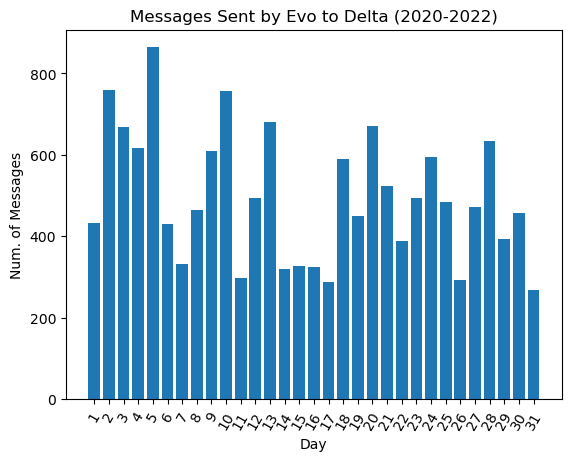

In [18]:
plt.bar(day['day'], day['num_mssg'])
plt.xticks(rotation=60, ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.xlabel('Day')
plt.ylabel('Num. of Messages')
plt.title('Messages Sent by Evo to Delta (2020-2022)')
plt.show()

---

## Finding day of the week

In [19]:
import pandas as pd

d = pd.Timestamp('2022-05-02')
print(d.dayofweek, d.day_name())

0 Monday
